# Machine Learning: Tipos de Aprendizaje en Python
Este tutorial muestra los tres tipos principales de aprendizaje en Machine Learning: **supervisado**, **no supervisado**, y **por refuerzo**. Cada sección incluye un ejemplo visual y comentado.

---

## 1. Aprendizaje Supervisado

### Problema: Ajustar una función simple (seno) usando un perceptrón

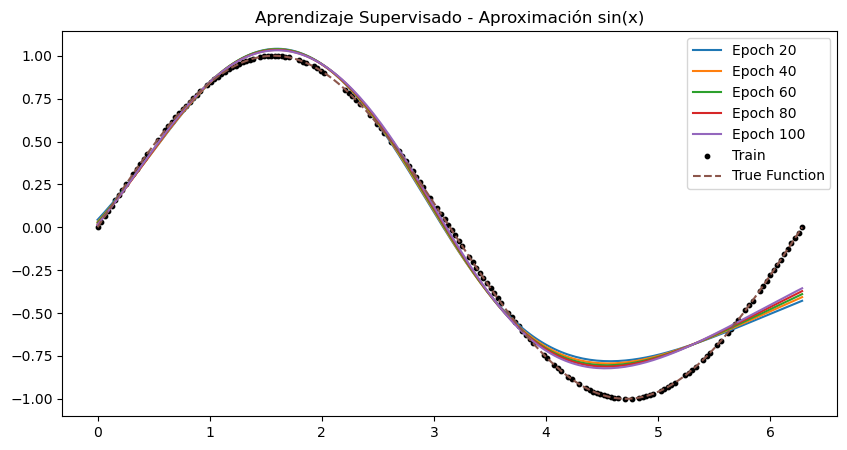

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


X = np.linspace(0, 2 * np.pi, 200).reshape(-1, 1)
y = np.sin(X).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(11,5), activation='tanh', solver='adam', max_iter=10000, warm_start=True)

plt.figure(figsize=(10, 5))
for epoch in range(1, 101):
    mlp.fit(X_train, y_train)
    if epoch % 20 == 0:
        y_pred = mlp.predict(X)
        plt.plot(X, y_pred, label=f'Epoch {epoch}')

plt.scatter(X_train, y_train, color='black', s=10, label='Train')
plt.plot(X, y, label='True Function', linestyle='--')
plt.legend()
plt.title('Aprendizaje Supervisado - Aproximación sin(x)')
plt.show()

---

## 2. Aprendizaje No Supervisado

### Problema: Agrupar datos en 4 clústers bien definidos usando KMeans

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


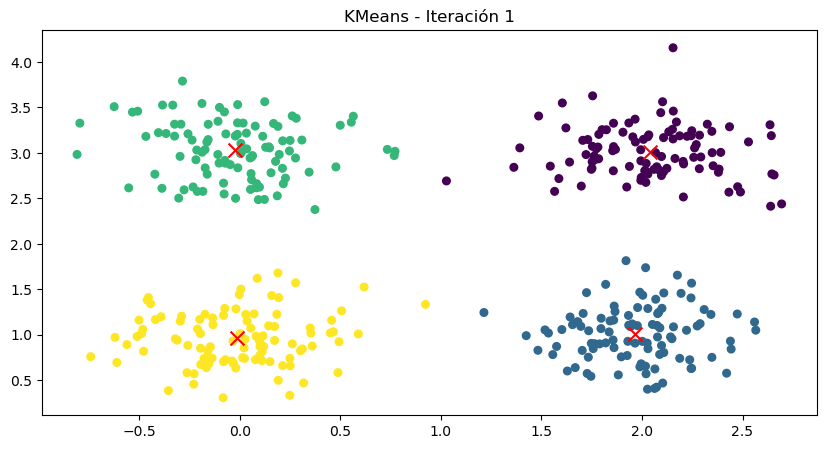

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


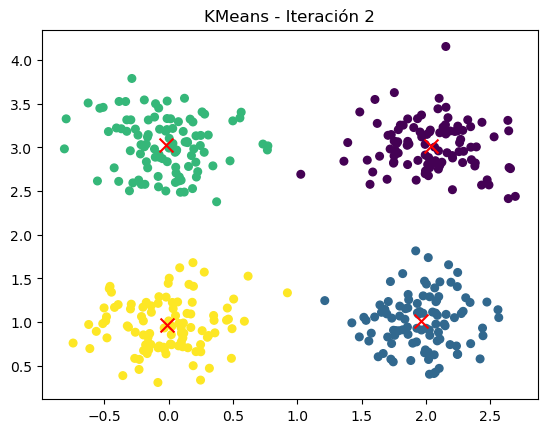

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


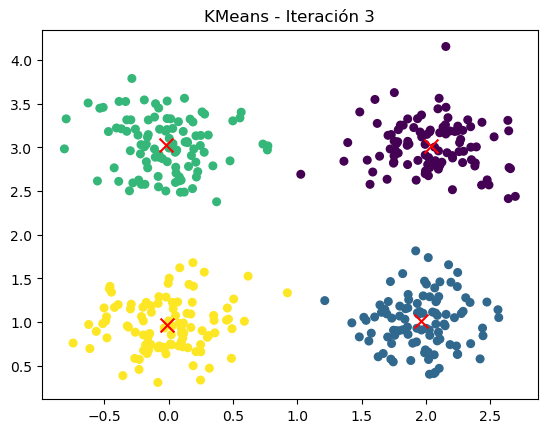

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


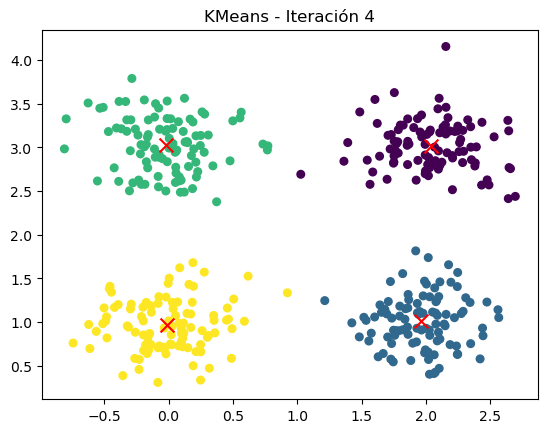

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


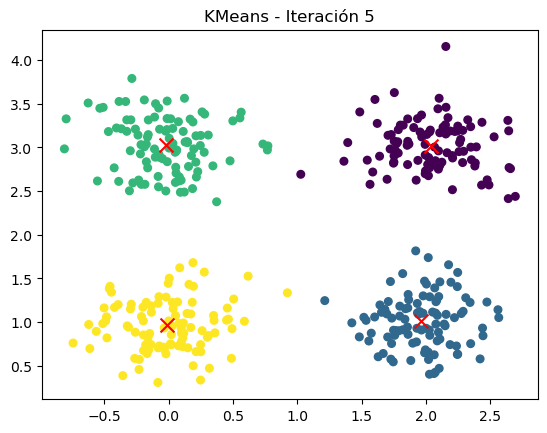

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


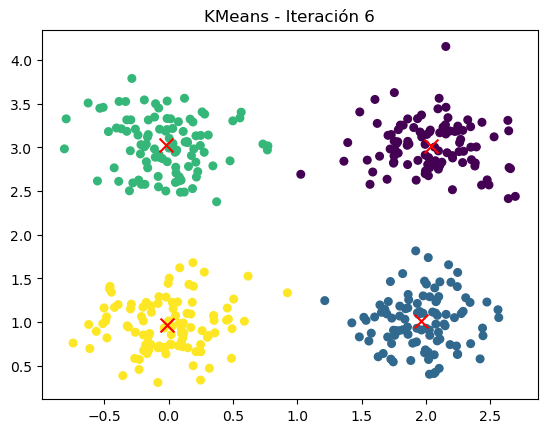

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


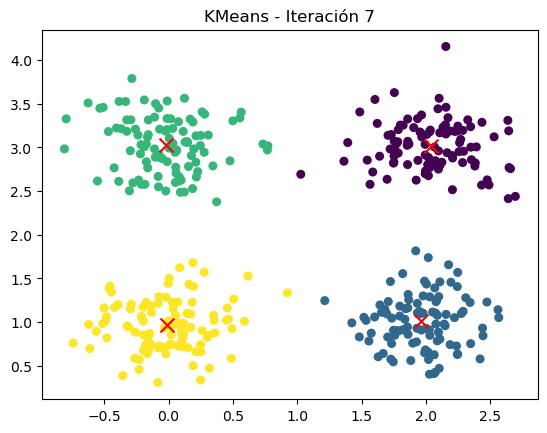

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


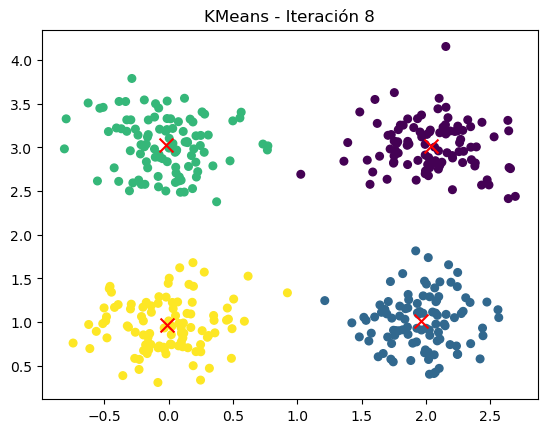

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


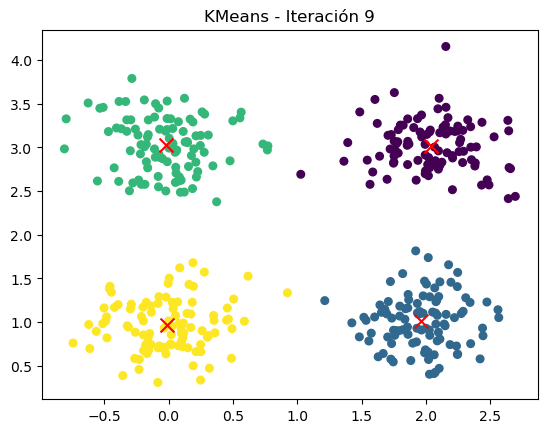

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


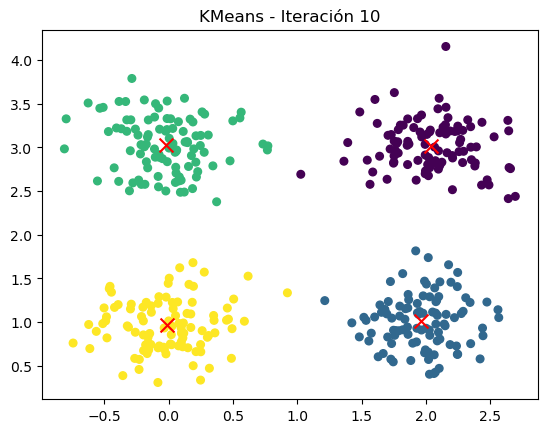

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

centers = [(2, 1), (2, 3), (0, 1), (0, 3)]
X, _ = make_blobs(n_samples=400, centers=centers, cluster_std=0.3, random_state=42)

plt.figure(figsize=(10, 5))
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

for step in range(1, 11):
    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=step, random_state=42)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroides')
    plt.title(f'KMeans - Iteración {step}')
    plt.pause(0.5)

plt.show()

---

## 3. Aprendizaje por Refuerzo

### Problema: Un agente aprende a alcanzar una meta en un grid simple

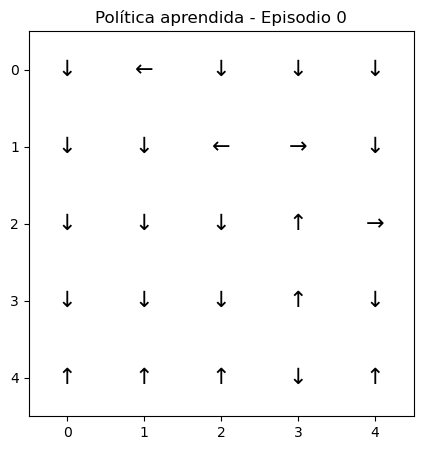

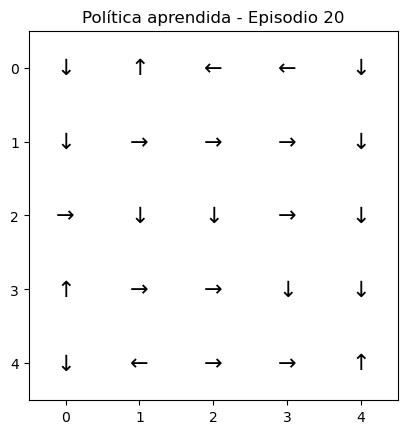

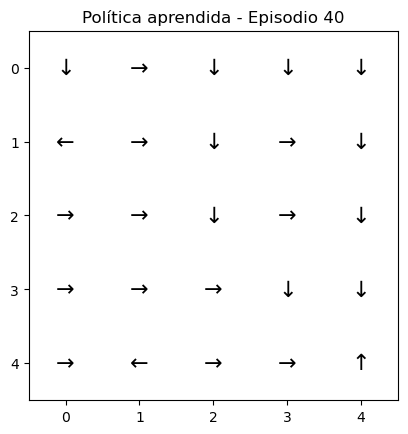

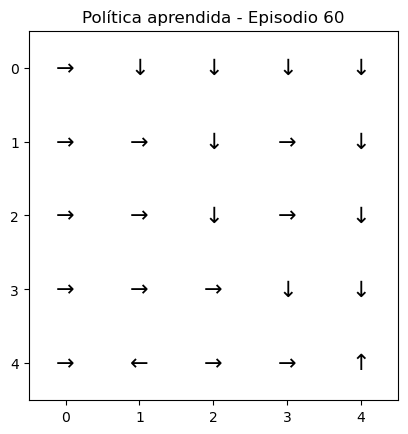

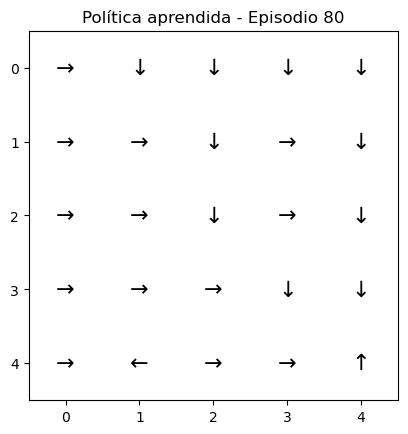

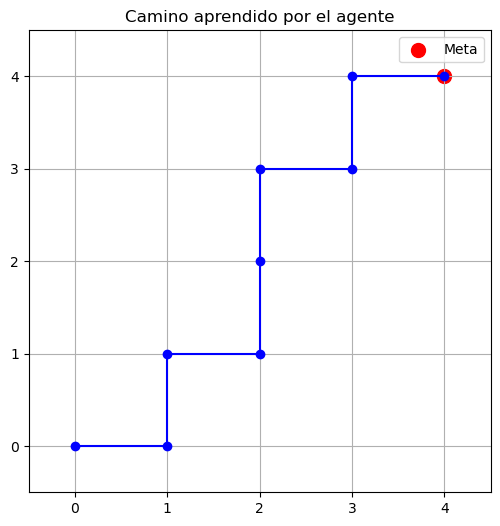

In [4]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 5
Q = np.zeros((grid_size, grid_size, 4))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def step(state, action):
    x, y = state
    if action == 0:
        x = max(0, x - 1)
    elif action == 1:
        x = min(grid_size - 1, x + 1)
    elif action == 2:
        y = max(0, y - 1)
    elif action == 3:
        y = min(grid_size - 1, y + 1)
    reward = 1 if (x, y) == (4, 4) else -0.01
    return (x, y), reward

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    return np.argmax(Q[state[0], state[1]])

def update_Q(state, action, reward, next_state):
    predict = Q[state[0], state[1], action]
    target = reward + gamma * np.max(Q[next_state[0], next_state[1]])
    Q[state[0], state[1], action] += alpha * (target - predict)

plt.figure(figsize=(10, 5))
for episode in range(100):
    state = (0, 0)
    while state != (4, 4):
        action = choose_action(state)
        next_state, reward = step(state, action)
        update_Q(state, action, reward, next_state)
        state = next_state

    if episode % 20 == 0:
        policy = np.chararray((grid_size, grid_size), unicode=True)
        for i in range(grid_size):
            for j in range(grid_size):
                best = np.argmax(Q[i, j])
                policy[i, j] = ['↑', '↓', '←', '→'][best]
        plt.clf()
        plt.imshow(np.ones((grid_size, grid_size)), cmap='gray', vmin=0, vmax=1)
        for i in range(grid_size):
            for j in range(grid_size):
                plt.text(j, i, policy[i, j], ha='center', va='center', fontsize=16)
        plt.title(f'Política aprendida - Episodio {episode}')
        plt.pause(0.5)

state = (0, 0)
path = [state]
while state != (4, 4):
    action = np.argmax(Q[state[0], state[1]])
    state, _ = step(state, action)
    path.append(state)

path = np.array(path)
plt.figure(figsize=(6, 6))
plt.imshow(np.ones((grid_size, grid_size)), cmap='gray', vmin=0, vmax=1)
plt.plot(path[:, 1], path[:, 0], marker='o', color='blue')
plt.scatter(4, 4, color='red', s=100, label='Meta')
plt.title('Camino aprendido por el agente')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

---

Cada sección demuestra un tipo de aprendizaje distinto con visualización clara del proceso de entrenamiento. Puedes ejecutar el código en un entorno local como Jupyter Notebook o Google Colab para ver las animaciones en vivo.